The digital world is evolving, and so are Vanguard’s clients. Vanguard believed that a more intuitive and modern User Interface (UI), coupled with timely in-context prompts (cues, messages, hints, or instructions provided to users directly within the context of their current task or action), could make the online process smoother for clients. The critical question was: Would these changes encourage more clients to complete the process?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
%matplotlib inline

In [2]:
# Demographics like age, gender, and account details of our clients.
client_data = pd.read_csv("data\df_final_demo.txt")


digital_foot_1 = pd.read_csv("data\df_final_web_data_pt_1.txt")
digital_foot_2 = pd.read_csv("data\df_final_web_data_pt_2.txt")

# A list revealing which clients were part of the grand experiment

clients_included = pd.read_csv("data\df_final_experiment_clients.txt")


In [3]:
# merge the two digital foot print datasets

digital_foot = pd.concat([digital_foot_1,digital_foot_2],axis=0)
digital_foot.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [4]:
digital_foot.shape

(755405, 5)

In [5]:
digital_foot.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [6]:
client_data.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [7]:
client_data.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70595.000000,70595.000000,70594.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.004992e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.591273,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [8]:
clients_included

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [9]:
clients_included.isnull().sum()

client_id        0
Variation    20109
dtype: int64

In [10]:
# drop the rows that are na from the clients that were in the control and test groups
clients_included.dropna(inplace=True)
clients_included.shape

(50500, 2)

In [11]:
clients_included.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [12]:
client_data.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


## Univariate EDA

### Exploring Numercial and Categorical Variables

#### Numerical Variables

In [13]:
# list of the data types in the df
list(set(client_data.dtypes.to_list()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [14]:
# find the numerical columns of clients_included df
clients_included.select_dtypes("number").columns

Index(['client_id'], dtype='object')

In [15]:
# find the numerical columns of the client data
client_data.select_dtypes('number').columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [16]:
# find the numerical columns of the digital foot data
digital_foot.select_dtypes('number').columns

Index(['client_id'], dtype='object')

#### Categorical Variables

In [17]:
# categorical data for the clients data
client_data.select_dtypes("object").columns

Index(['gendr'], dtype='object')

In [18]:
# categorical data for the digital foot data
digital_foot.select_dtypes("object").columns

Index(['visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

In [19]:
# categorical data for the client included data
clients_included.select_dtypes("object").columns

Index(['Variation'], dtype='object')

### Data Cleaning

In [20]:
# clean the gendr column to only have three categories
# fillna with 'U'
client_data['gendr'].fillna('U',inplace=True)
client_data['gendr'].unique()

array(['U', 'M', 'F', 'X'], dtype=object)

In [21]:
# replace the unknown value meaning from X to U
client_data['gendr'].replace('X','U',inplace=True)
client_data['gendr'].unique()

array(['U', 'M', 'F'], dtype=object)

In [22]:
client_data.isna().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr                0
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [23]:
# replace the na values in client age with the mode
client_data['clnt_age'].fillna(client_data['clnt_age'].mode()[0], inplace=True)

In [24]:
client_data.isnull().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age             0
gendr                0
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

## Univariate Analysis

#### Frequency Table for the categorical variables

In [25]:
# freq table for gender for all clients
gender_freq = client_data['gendr'].value_counts()
gender_freq

# crosstab for gender
gender_crosstab = pd.crosstab(index=client_data['gendr'],columns="count")
gender_crosstab

col_0,count
gendr,
F,22746
M,23724
U,24139


In [26]:
# Freq table for process step
# process_step_freq = digital_foot['process_step'].value_counts()
# process_step_freq
process_table = pd.crosstab(index = digital_foot['process_step'],columns = "count")
process_table

col_0,count
process_step,
confirm,102963
start,243945
step_1,163193
step_2,133062
step_3,112242


In [27]:
proportion_steps = digital_foot['process_step'].value_counts(normalize=True)
proportion_steps

start      0.322933
step_1     0.216034
step_2     0.176147
step_3     0.148585
confirm    0.136302
Name: process_step, dtype: float64

In [28]:
# Test/Control crosstab
variation_table = pd.crosstab(index = clients_included['Variation'],columns='count')
variation_table

# proportion of the test/control to varify that the data test/control are close to equally split
variation_prop=clients_included['Variation'].value_counts(normalize=True)
variation_prop

Test       0.53402
Control    0.46598
Name: Variation, dtype: float64

### Univariate Visualization

#### Categorical Visualization

<Axes: xlabel='gendr', ylabel='count'>

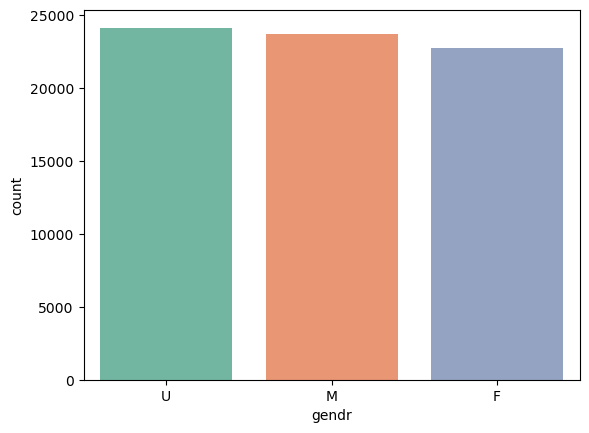

In [29]:
# countplot for gender
sns.countplot(data=client_data, x='gendr', palette="Set2")

##### The gender categories appear to be close to equally split into the three categories

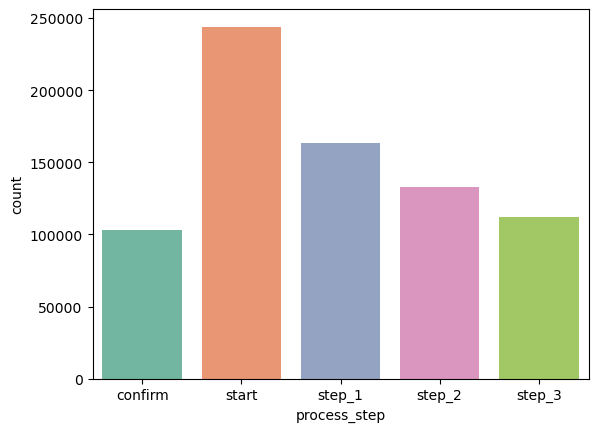

In [30]:
# plot the barplot for the process step count
sns.barplot(x=process_table.index, y=process_table["count"], palette="Set2");

##### From the digital foot print data only about half get to the confirm step of the process

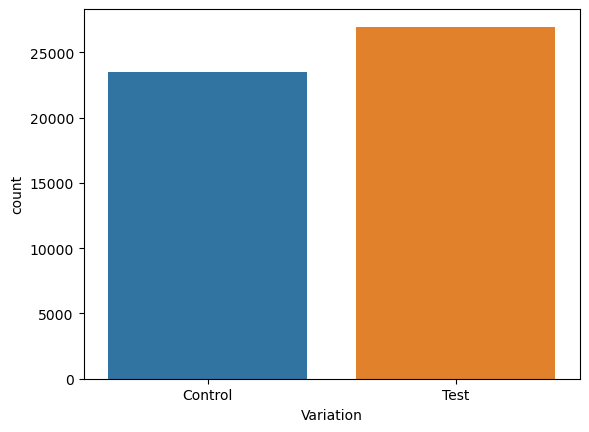

In [31]:
# plot the bar plot for the count of test/control
sns.barplot(x=variation_table.index, y=variation_table["count"]);

##### the control and the test appear to be equally divided in the clients data 

#### Univariate Numerical visualization

In [32]:
# client_data: client age, num_accts, bal
client_data.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70595.000000,70595.000000,70609.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.004992e+06,12.052950,150.659367,46.444802,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.590607,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


**Measures of Centrality**

In [33]:
# measures of centrality for account balances
mean_acctBal = client_data['bal'].mean()
mode_accBal =  client_data['bal'].mode()[0]
median_accbal = client_data['bal'].median()

mean_acctBal, mode_accBal, median_accbal

(147445.24064140575, 31188.62, 63332.9)

In [34]:
# measures of centrality for age
mean_age = client_data['clnt_age'].mean()
mode_age = client_data['clnt_age'].mode()[0]
median_age = client_data['clnt_age'].median()

mean_age, mode_age, median_age

(46.44480165418006, 58.5, 47.0)

In [35]:
client_data['bal'].fillna(client_data['bal'].mode()[0],inplace=True)
client_data['bal'] = client_data['bal'].astype(int)
client_data['bal'].dtypes

dtype('int32')

#### Univarte Numerical Visualization

<Axes: xlabel='clnt_age', ylabel='Count'>

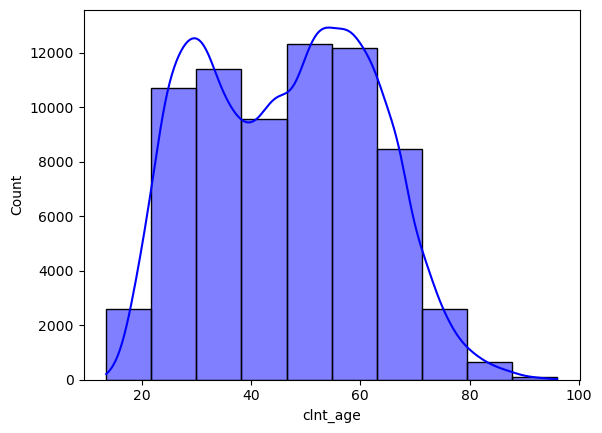

In [36]:
# histogram to show age dispersion
sns.histplot(client_data['clnt_age'],kde=True,bins = 10,color='blue')

<Axes: xlabel='bal', ylabel='Count'>

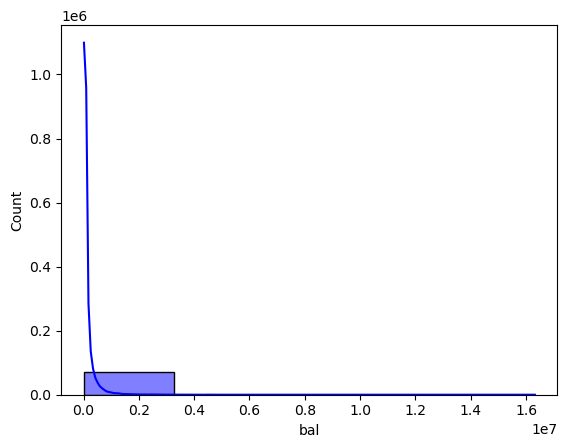

In [37]:
# Histogram to show the account balance dispersion
sns.histplot(client_data['bal'],kde=True,bins=5,color='blue')

In [38]:
potential_categorical_from_numerical = client_data.select_dtypes("number").loc[:, client_data.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

,num_accts,calls_6_mnth,logons_6_mnth
0,2.0,6.0,9.0
1,2.0,6.0,9.0
2,2.0,6.0,9.0
3,2.0,3.0,6.0
4,2.0,0.0,3.0
...,...,...,...
70604,3.0,5.0,5.0
70605,2.0,6.0,6.0
70606,2.0,3.0,3.0
70607,3.0,4.0,4.0


In [39]:
# histogram for each numerical column in the client data
client_data_numerical = client_data.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

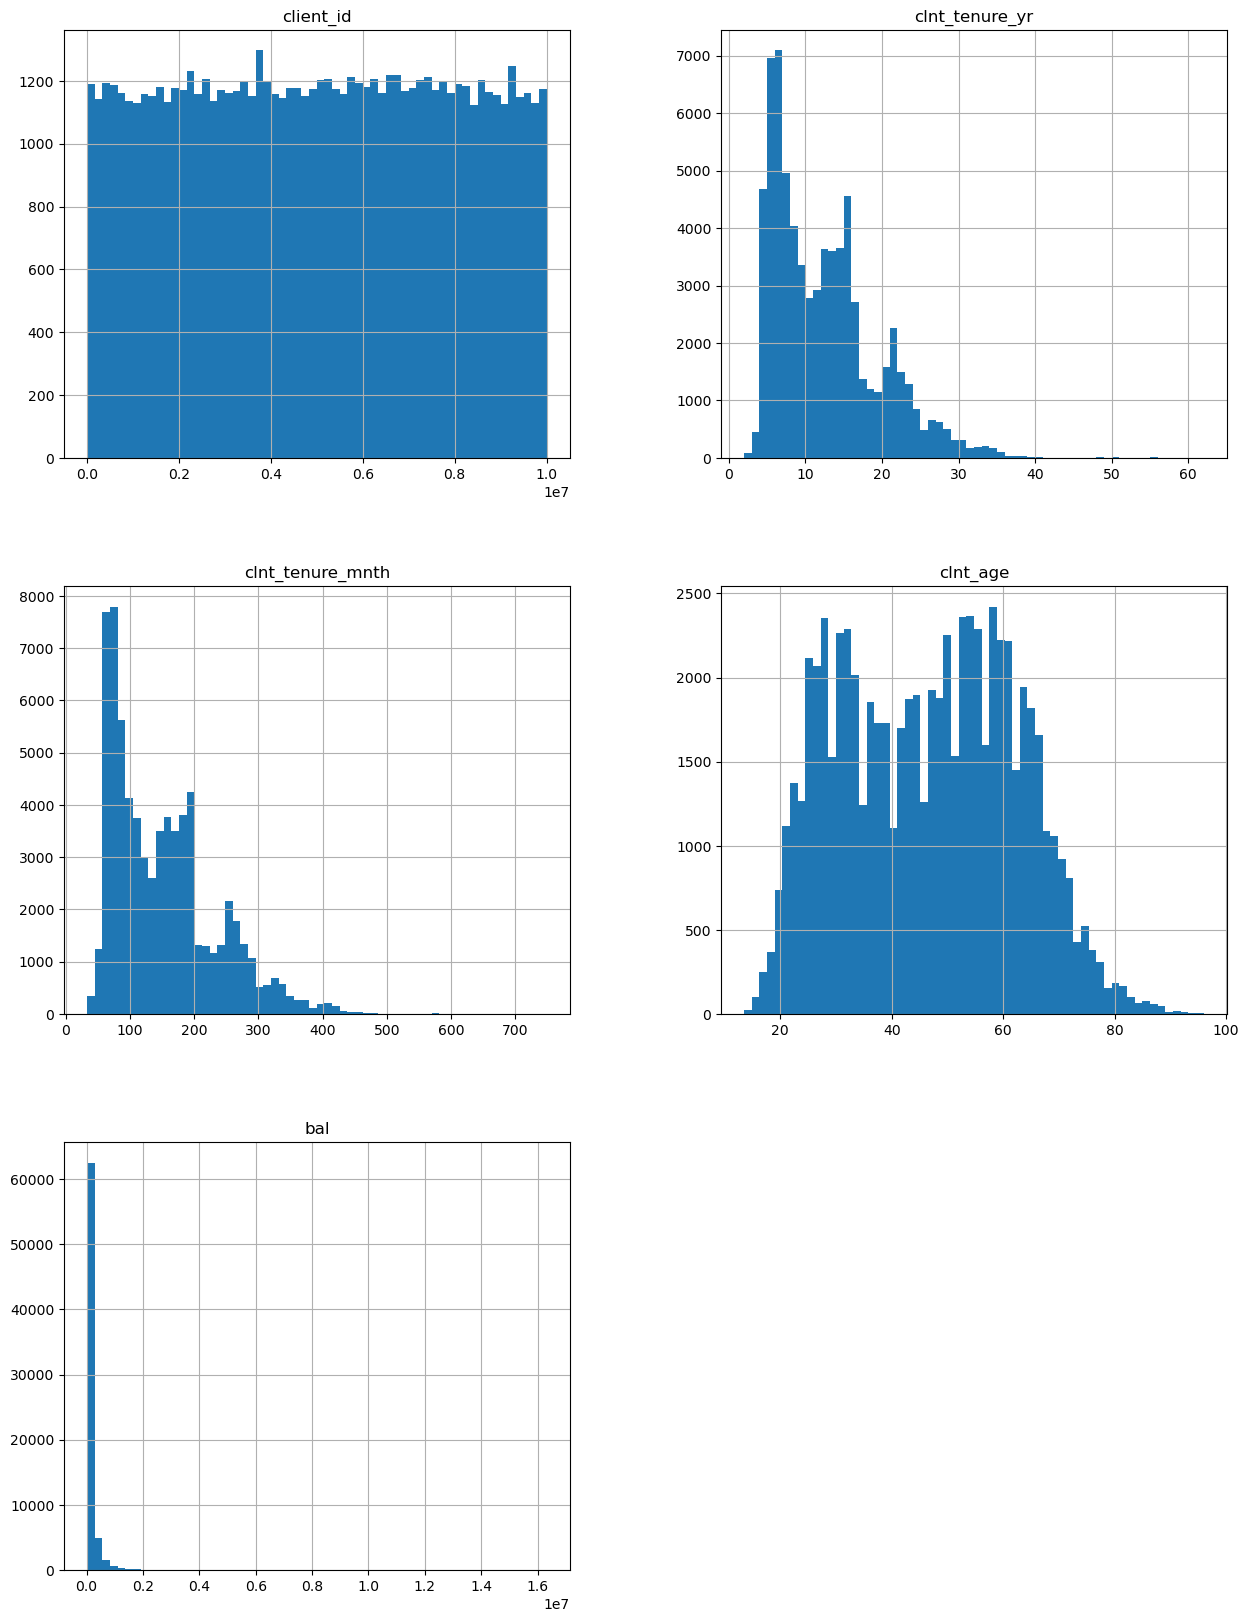

In [40]:
# Creating histograms for each numerical column in 'client_data_numerical'
client_data_numerical.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

<Axes: >

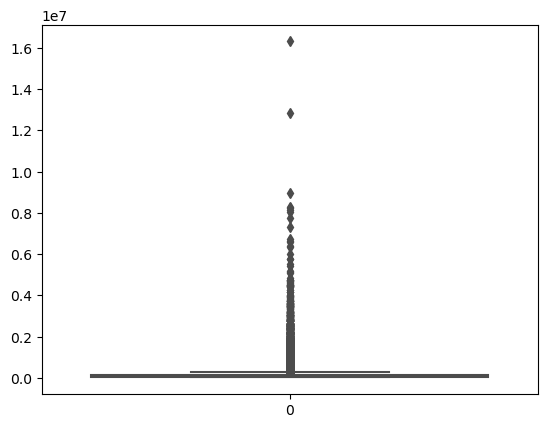

In [41]:
# boxplot for the bal column
sns.boxplot(data = client_data['bal'], color = 'blue')

# EDA Bivariate Analysis

In [42]:
clients_included.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [43]:
digital_foot.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [44]:
# filter the digital foot print data for only those that were part of the A/Btesting
filtered_digital = pd.merge(clients_included,digital_foot,on='client_id',how='left')
filtered_digital

,client_id,Variation,visitor_id,visit_id,process_step,date_time
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36


In [45]:
filtered_digital.isna().sum()

client_id       0
Variation       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [46]:
filtered_digital['Variation'].unique()

array(['Test', 'Control'], dtype=object)

In [47]:
# Test/Control crosstab
variation_table_v2 = pd.crosstab(index = clients_included['Variation'],columns='count')
variation_table_v2

col_0,count
Variation,
Control,23532
Test,26968


In [48]:
filtered_digital.head()

,client_id,Variation,visitor_id,visit_id,process_step,date_time
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


##### Categorical vs categorical

In [49]:
# crosstab of variation and process_step
var_process_crosstab = pd.crosstab(filtered_digital['Variation'],filtered_digital['process_step'])
var_process_crosstab

process_step,confirm,start,step_1,step_2,step_3
Variation,,,,,
Control,17505,47608,29668,25886,22795
Test,25722,56474,38768,30989,25894


In [50]:
# chi square test for variation and process step
chi2_stats,chi2_p_value,_,_ = chi2_contingency(var_process_crosstab)

chi2_stats,chi2_p_value


(508.4364763023511, 1.0030756272740076e-108)

<Axes: xlabel='Variation'>

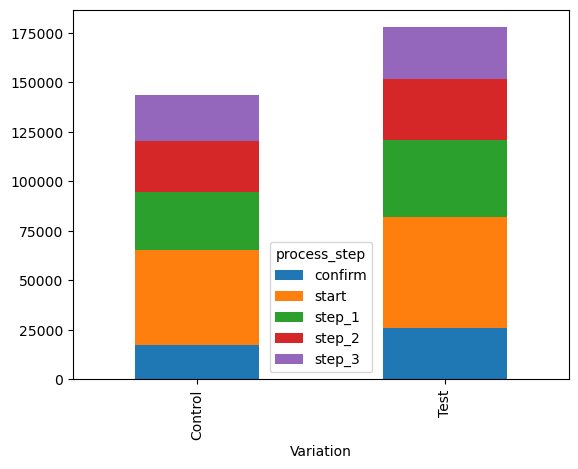

In [51]:
# plotting stacked bar for the crosstab
var_process_crosstab.plot(kind="bar",stacked = True)

<Axes: xlabel='gendr', ylabel='num_accts'>

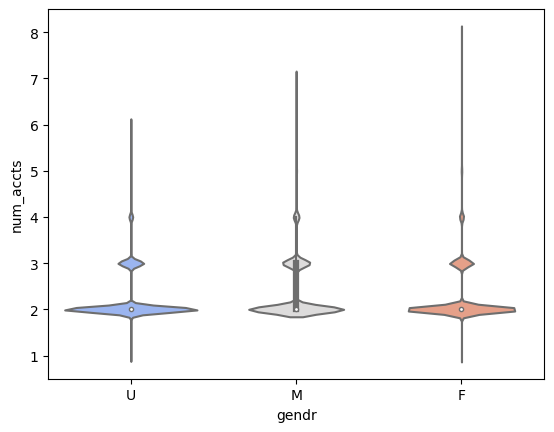

In [52]:
# categorical vs continous
# gender and num of accounts in the client_data
# Violin plots
sns.violinplot(data=client_data, x='gendr', y='num_accts',palette='coolwarm')

<Axes: xlabel='gendr', ylabel='num_accts'>

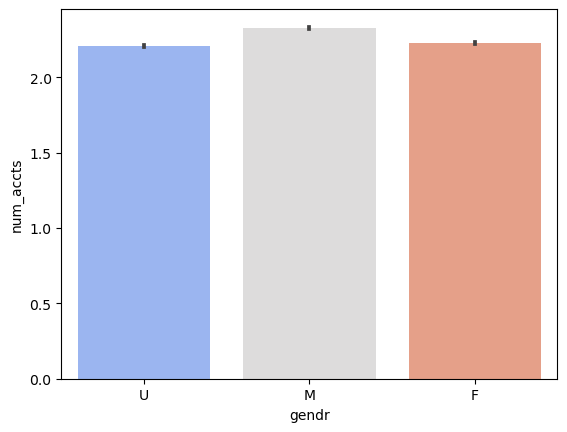

In [53]:
# bar chart of the gender and num of accounts
sns.barplot(data=client_data,x='gendr',y='num_accts',palette='coolwarm')

## Hypothesis Testing

In [54]:
# one hot encoding the process_step column since the original column is an object column
filtered_digital_encoded=pd.get_dummies(filtered_digital,columns=['process_step'])
filtered_digital_encoded

,client_id,Variation,visitor_id,visit_id,date_time,process_step_confirm,process_step_start,process_step_step_1,process_step_step_2,process_step_step_3
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,2017-04-17 15:27:07,0,0,0,0,1
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,2017-04-17 15:26:51,0,0,0,1,0
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,2017-04-17 15:19:22,0,0,0,0,1
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,2017-04-17 15:19:13,0,0,0,1,0
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,2017-04-17 15:18:04,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,2017-04-11 08:45:38,0,0,0,1,0
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,2017-04-11 08:44:43,0,0,1,0,0
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,2017-04-11 08:44:30,0,0,0,1,0
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,2017-04-11 08:42:36,0,0,1,0,0


In [64]:
# set the hypothesis

#H0: The mean(mu) of those that got to the confirm step in the control group is equal to the mean(mu) of those that got to the confirm step in the test group

# H0: mu confirm in control group = mu confirm in the test group

# H1: The mean()mu of those in the test group that got to the confirm step is greater than those in the control group that got to the confirm step.

# H1: mu confirm test group > mu confirm control group

# significance level: 0.05

# two sample test for two independent variables

In [75]:
# get the data for control group that got to the confirm stage
control_group = filtered_digital_encoded[filtered_digital_encoded['Variation']=='Control']['process_step_confirm']

# test group data
test_group = filtered_digital_encoded[filtered_digital_encoded['Variation']=='Test']['process_step_confirm']

In [76]:
control_group

20        1
21        1
22        1
23        0
24        0
         ..
321265    0
321266    0
321267    0
321268    0
321269    0
Name: process_step_confirm, Length: 143462, dtype: uint8

In [77]:
test_group

0         0
1         0
2         0
3         0
4         0
         ..
321304    0
321305    0
321306    0
321307    0
321308    0
Name: process_step_confirm, Length: 177847, dtype: uint8

In [98]:
# two sample t-test for two independent variables
# Alternative Hypothesis is that the test group confirm mean is greater than the control group confirm mean
t_stats,p_value = ttest_ind(test_group,control_group,alternative='greater')

In [100]:
print("t-statistics",t_stats)
print("p-value",p_value)

t-statistics 18.683323532908005
p-value 3.721822126235018e-78


In [102]:
# Check if the p-value is less than the significance level (0.05)
if p_value < 0.05:
    print("Reject null hypothesis: The mean of those that got to the confirm step in the test group is equal to the mean of those that got to the confirm step in the control group ")
else:
    print("Fail to reject null hypothesis: The mean of those that reached the confirm step in the test group is greater than the mean of those that got to the confirm step in the test group")

Reject null hypothesis: The mean of those that got to the confirm step in the test group is equal to the mean of those that got to the confirm step in the control group 


In [88]:
control_group.mean()

0.12201837420362187

In [82]:
test_group.mean()

0.1446299347191687

In [83]:
control_group.value_counts()

0    125957
1     17505
Name: process_step_confirm, dtype: int64

In [85]:
test_group.value_counts()

0    152125
1     25722
Name: process_step_confirm, dtype: int64